Chapter 15

# 截断型SVD分解，照片
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import numpy as np
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [2]:
# Load image
# img = plt.imread("iris_photo.jpg")

# # Donwsample and encode RGBa image as matrix of intensities, X
# DOWNSAMPLE = 4
# R = img[::DOWNSAMPLE, ::DOWNSAMPLE, 0]
# G = img[::DOWNSAMPLE, ::DOWNSAMPLE, 1]
# B = img[::DOWNSAMPLE, ::DOWNSAMPLE, 2] 
# X = 0.2989 * R + 0.5870 * G + 0.1140 * B

from skimage import color
from skimage import io

In [3]:
X = color.rgb2gray(io.imread('iris_photo.jpg'))
# DOWNSAMPLE = 5
# X = X[::DOWNSAMPLE, ::DOWNSAMPLE]
# Calculate the rank of the data matrix, X

In [31]:
X.min()

0.0

In [32]:
X.max()

1.0

In [33]:
X.shape

(2990, 2714)

In [37]:
np.linalg.matrix_rank(X)

2714

In [4]:
# Run SVD on Image
U, S, V = np.linalg.svd(X)

n_components = len(S)
component_idx = range(1,  n_components + 1)

lambda_i = np.square(S)/(X.shape[0] - 1)
# approximation, given that X is not centered

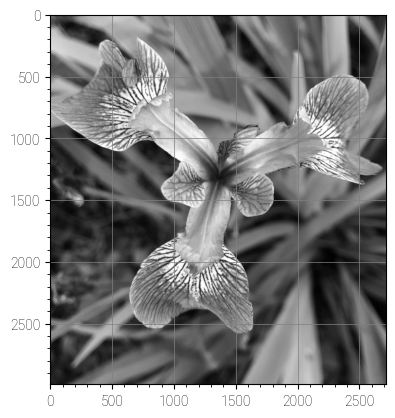

In [5]:
# Visualizations
fig, axs = plt.subplots()

## Raw Image, X （down-sampled)
plt.imshow(X, cmap='gray')

Text(0, 0.5, 'Singular value')

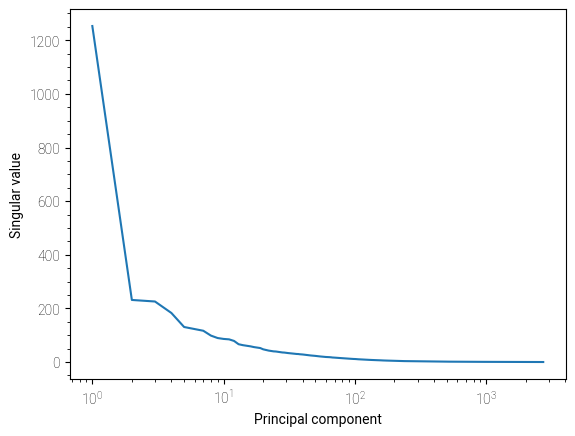

In [6]:
## Singular values 
fig, ax = plt.subplots()

### Raw singular values
plt.plot(component_idx, S)
plt.grid()
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.ylabel('Singular value')

Text(0, 0.5, 'Eigen value')

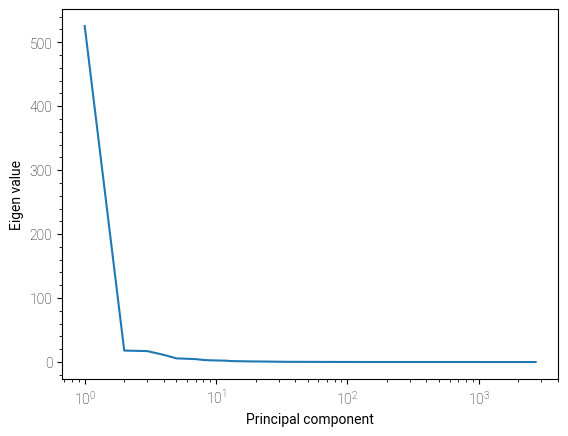

In [7]:
## Eigen value
fig, ax = plt.subplots()

### Raw singular values
plt.plot(component_idx, lambda_i)
plt.grid()
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.ylabel('Eigen value')

In [8]:
# Calculate the cumulative variance explained
variance_explained = 100 * np.cumsum(lambda_i) / lambda_i.sum()

Text(0, 0.5, 'Cumulative variance explained (%)')

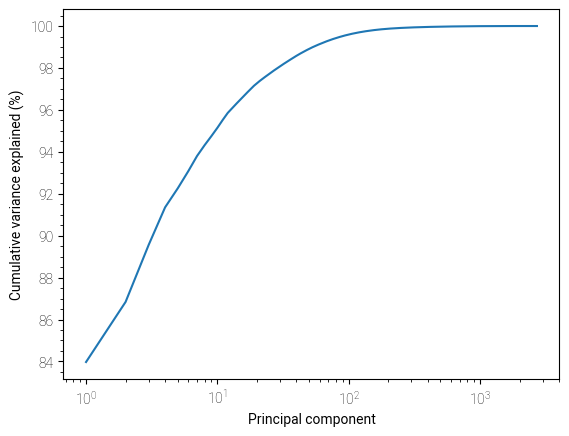

In [9]:
fig, ax = plt.subplots()
plt.plot(component_idx, variance_explained)
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.grid()
plt.ylabel('Cumulative variance explained (%)')

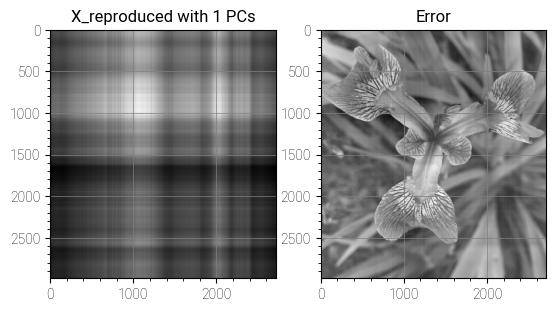

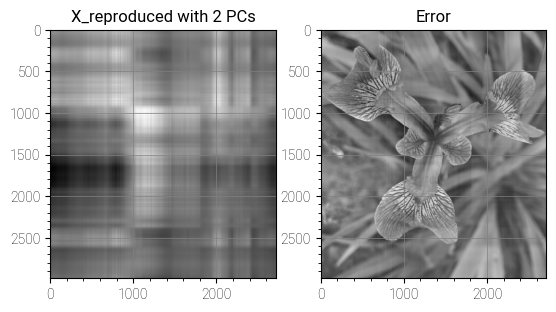

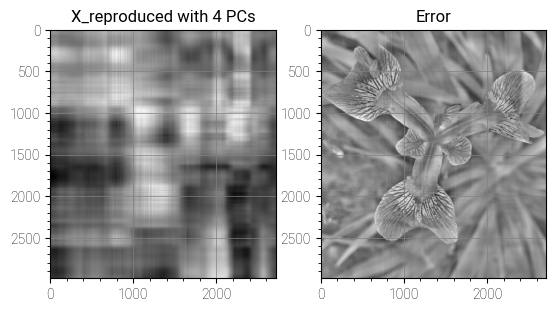

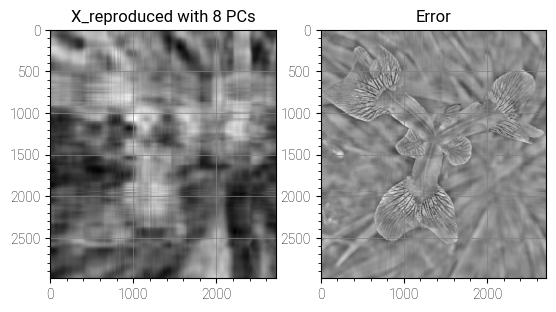

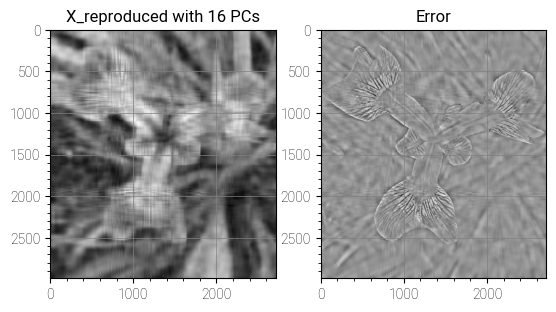

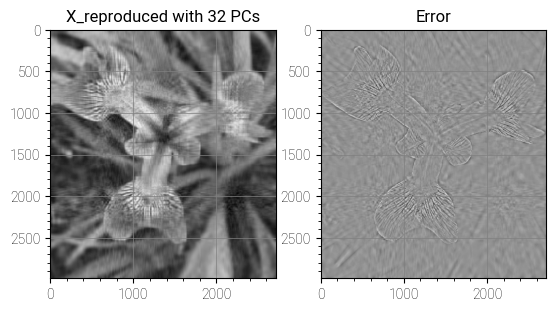

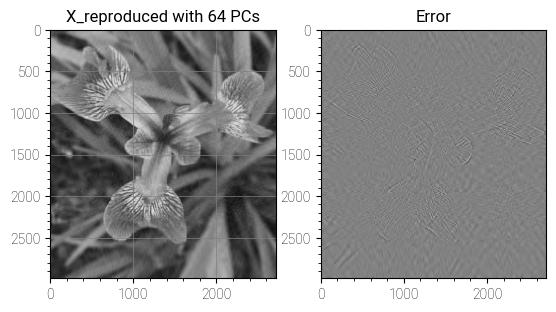

In [10]:
#%% Image Reconstruction

# Reconstruct image with increasing number of singular vectors/values
for rank in [1, 2, 4, 8, 16, 32, 64]:

    # Reconstructed Image
    X_reconstruction = U[:, :rank] * S[:rank] @ V[:rank,:]
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(X_reconstruction, cmap='gray')
    axs[0].set_title('X_reproduced with ' + str(rank) + ' PCs')

    ## Reconstruction error

    axs[1].imshow(X - X_reconstruction, cmap='gray')
    axs[1].set_title('Error')

In [42]:
U[:, order].shape

(2990,)

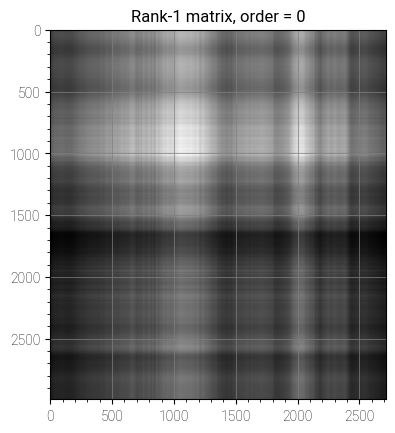

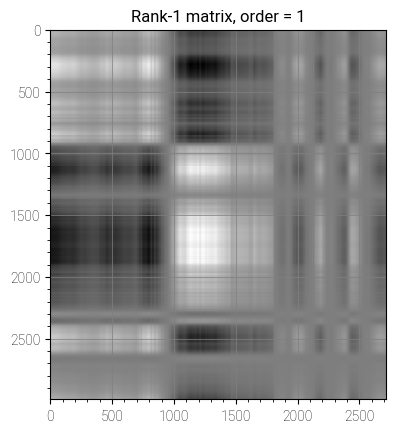

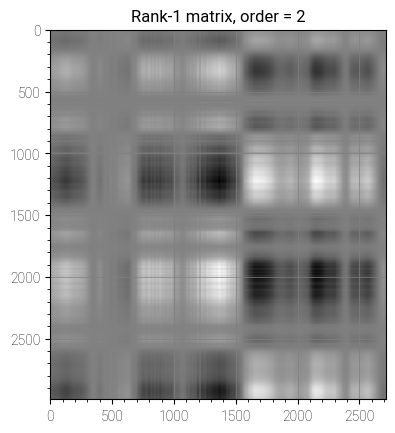

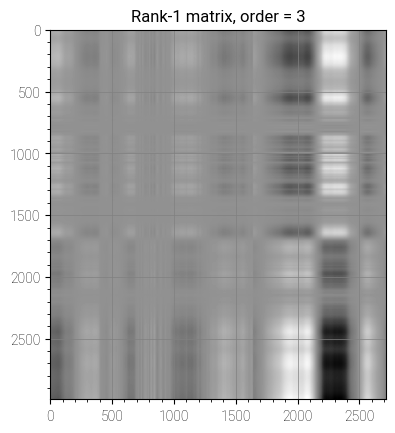

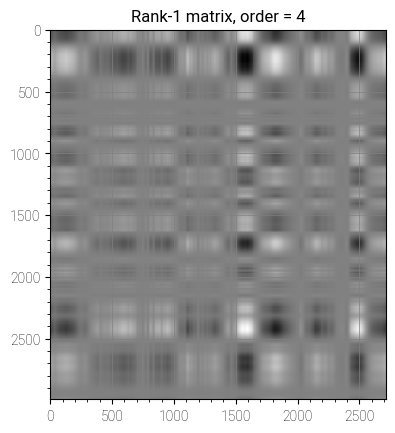

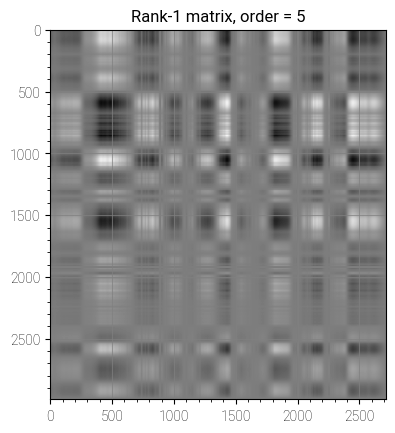

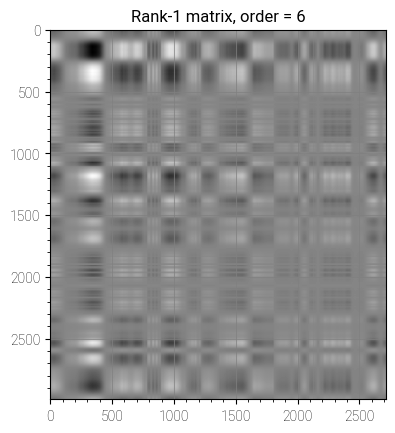

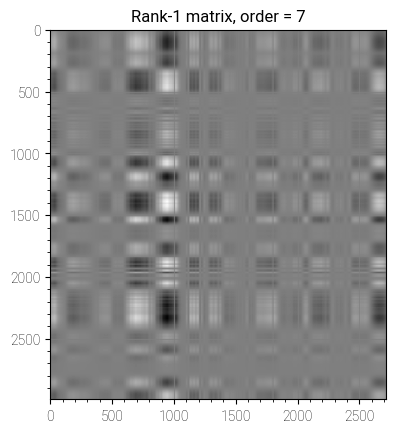

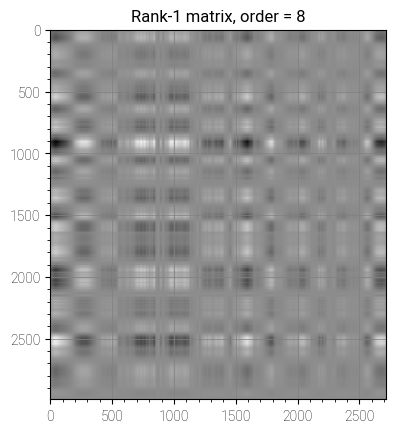

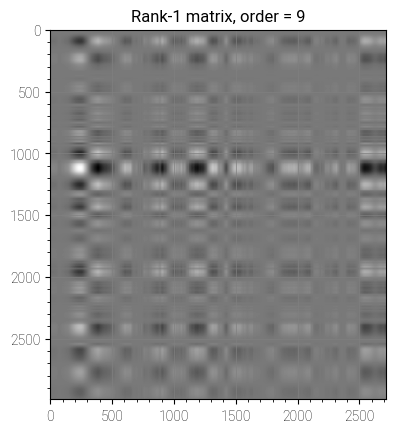

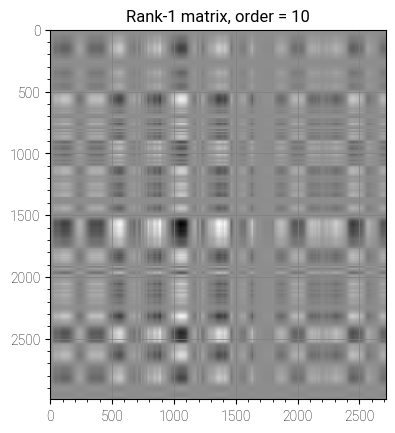

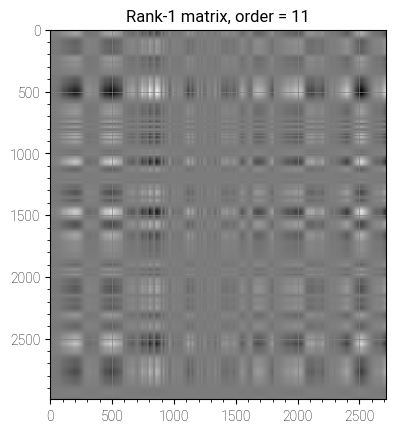

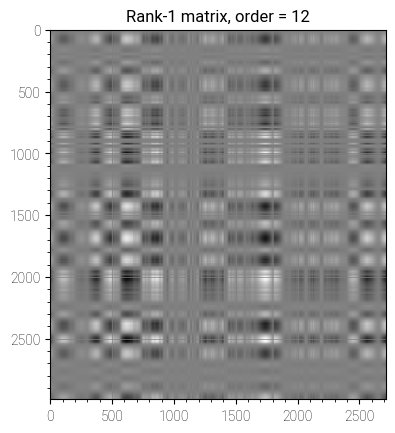

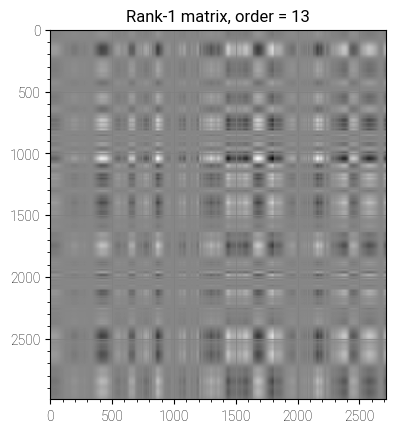

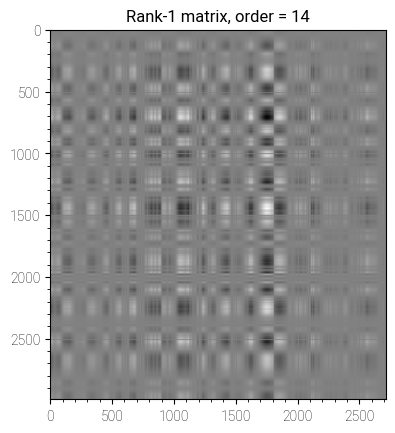

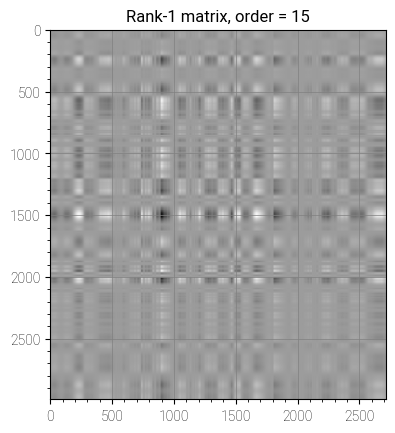

In [45]:
# 秩一矩阵
for order in np.arange(0,16):

    # Reconstructed Image
    X_rank_1 = S[order] * U[:, [order]] @ V[[order],:]
    
    fig, ax = plt.subplots(1, 1)
    ax.imshow(X_rank_1, cmap='gray')
    title = 'Rank-1 matrix, order = ' + str(order)
    ax.set_title(title)
    plt.savefig(title + '.svg')


Text(0.5, 1.0, 'Error')

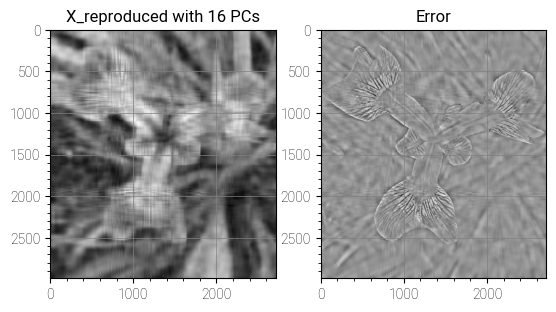

In [30]:
rank = 1

In [29]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16)

# 降维后的结果
X_reduced = svd.fit_transform(X)
print(X_reduced.shape)
# 结果为(2990, 16)

(2990, 16)


In [38]:
# 反变换，获取近似数据
X_approx = svd.inverse_transform(X_reduced)

print(X_approx.shape)
# 结果为(2990, 2714)

print(np.linalg.matrix_rank(X_approx))
# 结果为16

(2990, 2714)
16


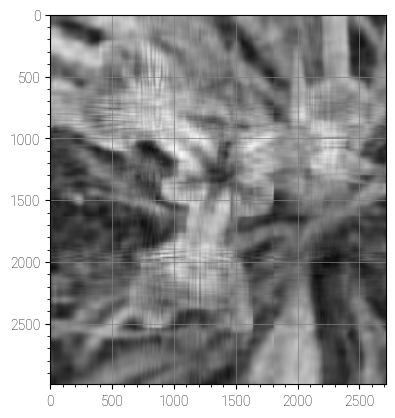

In [27]:
# 可视化
fig, axs = plt.subplots()

plt.imshow(X_approx, cmap='gray')